In [1]:
from models import load_model
from dataloader import load_dataset, load_dataloader 
from NSGA2 import run_NSGA2
from POBA_GA import run_POBA_GA
from tqdm import tqdm
from fitness import *
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [2]:
model_name = 'vgg16'
dataset_name = 'cifar10'

model = load_model(model_name, dataset_name)
dataset = load_dataset(dataset_name)
dataloader = load_dataloader(dataset)

In [3]:
fitness_fn = (attack_fitness, perturbation_fitness)

In [6]:
def plot_results(result_nsga,result_poba, pop_size, checkpoints):
    f1s = []
    f2s = []

    NSGA2_fit1s = []
    NSGA2_fit2s = []
    for result in result_nsga:
        g_fits, g_img = result
        NSGA2_fit1=[]
        NSGA2_fit2=[]
        for x in g_fits[0]:
            NSGA2_fit1.append(x[0])
            NSGA2_fit2.append(x[1])
        NSGA2_fit1s.append(NSGA2_fit1)
        NSGA2_fit2s.append(NSGA2_fit2)

        f1s+=NSGA2_fit1
        f2s+=NSGA2_fit2

    POBAs_fit1s = []
    POBAs_fit2s = []
    for result in result_poba:
        g_fits, g_img = result
        POBAs_fit1=[]
        POBAs_fit2=[]
        for x in g_fits:
            POBAs_fit1.append(x[0])
            POBAs_fit2.append(x[1])
        POBAs_fit1s.append(POBAs_fit1)
        POBAs_fit2s.append(POBAs_fit2)

        f1s+=POBAs_fit1
        f2s+=POBAs_fit2
    mean1,std1 = np.mean(f1s),np.std(f1s)
    mean2,std2 = np.mean(f2s),np.std(f2s)
    plt.title("pop_size = {}".format(pop_size))
    plt.xlabel("attack fitness")
    plt.ylabel("perturbation fitness(Z)")
    for fit1s,fit2s,f1s,f2s,gen in zip(NSGA2_fit1s,NSGA2_fit2s,POBAs_fit1s,POBAs_fit2s,checkpoints):
#         fit1s = (fit1s - mean1)/std1
#         fit2s = (fit2s - mean2)/std2
#         f1s = (f1s - mean1)/std1
#         f2s = (f2s - mean2)/std2
        
        plt.scatter(fit1s,fit2s, c = 'red', marker = 'x',s = 30, label = 'gen={} Ours'.format(gen))
#         plt.scatter(f1s,f2s, c='blue', marker = '^', s = 30,label = 'gen={} POBAGA'.format(gen))
        plt.legend()    
        plt.show()


  0%|          | 0/64 [00:00<?, ?it/s]

====data0===
vgg16 cifar10


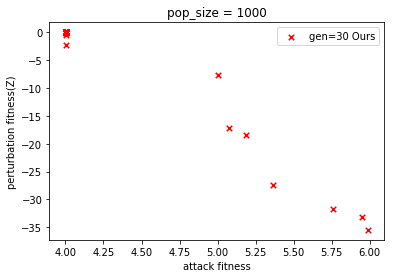

In [7]:
# checkpoints = [10,30,50,100,200,300]
checkpoints = [30]
n_generation = checkpoints[-1]
for idx,data in enumerate(tqdm(dataloader)):
    print("====data{}===".format(idx))
    print(model_name,dataset_name)
    for pop_size in [1000]:
        result_nsga = run_NSGA2(model, data[0][0], pop_size, n_generation, fitness_fn,checkpoints= checkpoints)
#         result_poba = run_POBA_GA(model, data[0][0], pop_size, n_generation, fitness_fn,checkpoints= checkpoints)
        plot_results(result_nsga,result_poba,pop_size,checkpoints)
    
    break
#     if idx ==3:
#         break
#         fit1s = [fit[0] for fit in result_fit[0]]
#         fit2s = [fit[1] for fit in result_fit[0]]
#         f1s = [fit[0] for fit in f]
#         f2s = [fit[1] for fit in f]
#         NSGA2_fit1s.append(fit1s)
#         NSGA2_fit2s.append(fit2s)
#         POBAs_fit1s.append(f1s)
#         POBAs_fit2s.append(f2s)

In [9]:
fits, img = result_nsga[0]

In [27]:
(im - data[0][0]).min()

0.0

4.002236366271973 1.4941769677534467e-05


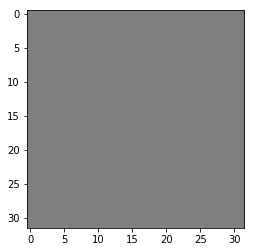

In [37]:
for f, im in zip(fits[0],img[0]):
    if f[0] <4.5:
        print(f[0],f[1])
        noise = im - data[0][0]
        noise = (noise - np.min(noise))/(1e-5+np.max(noise) - np.min(noise)) + 0.5
        plt.imshow(noise)
        plt.show()
        break

In [12]:
len(img),len(fits)

(1, 1)

In [ ]:
dd

  0%|          | 0/64 [00:00<?, ?it/s]

====data0===
vgg16 imagenet


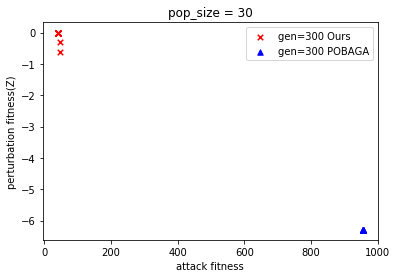

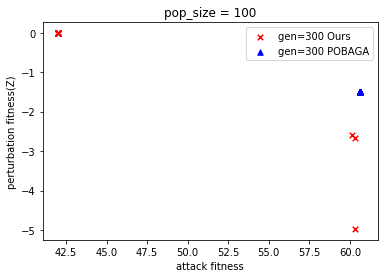

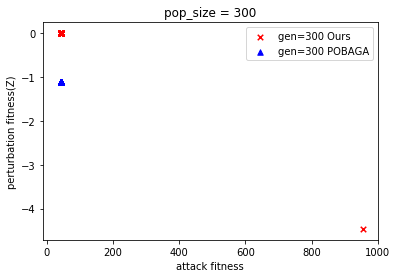

  2%|▏         | 1/64 [1:56:48<122:39:26, 7009.00s/it]

====data1===
vgg16 imagenet


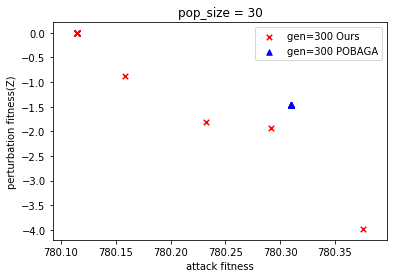

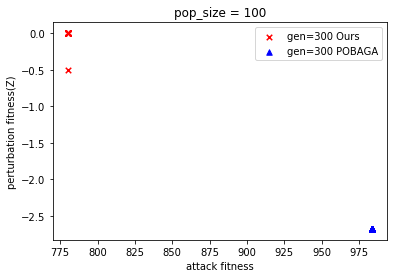

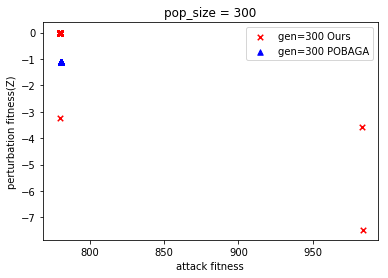

  3%|▎         | 2/64 [3:26:56<112:26:11, 6528.58s/it]

====data2===
vgg16 imagenet


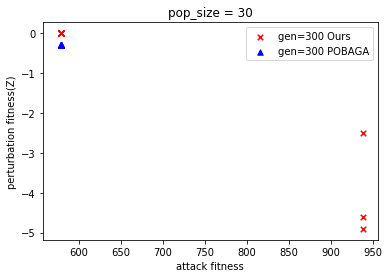

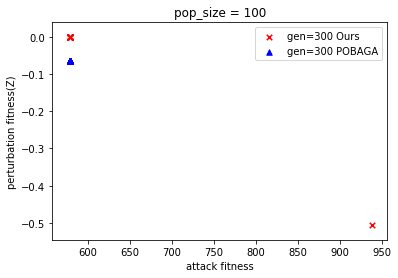

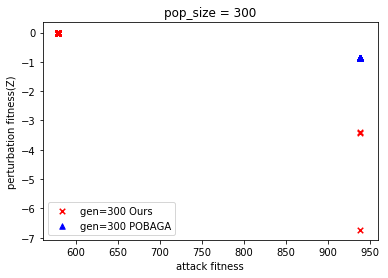

  5%|▍         | 3/64 [4:56:27<104:44:20, 6181.32s/it]

====data3===
vgg16 imagenet


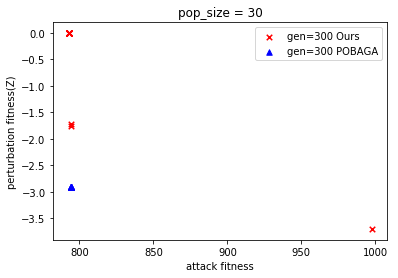

KeyboardInterrupt: 

In [5]:
# checkpoints = [10,30,50,100,200,300]
checkpoints = [300]
n_generation = checkpoints[-1]
for idx,data in enumerate(tqdm(dataloader)):
    print("====data{}===".format(idx))
    print(model_name,dataset_name)
    for pop_size in [30,100,300]:
        result_nsga = run_NSGA2(model, data[0][0], pop_size, n_generation, fitness_fn,checkpoints= checkpoints)
        result_poba = run_POBA_GA(model, data[0][0], pop_size, n_generation, fitness_fn,checkpoints= checkpoints)
        plot_results(result_nsga,result_poba,pop_size,checkpoints)

    if idx ==3:
        break
#         fit1s = [fit[0] for fit in result_fit[0]]
#         fit2s = [fit[1] for fit in result_fit[0]]
#         f1s = [fit[0] for fit in f]
#         f2s = [fit[1] for fit in f]
#         NSGA2_fit1s.append(fit1s)
#         NSGA2_fit2s.append(fit2s)
#         POBAs_fit1s.append(f1s)
#         POBAs_fit2s.append(f2s)



  0%|          | 0/10000 [00:00<?, ?it/s]

====data0===
vgg16 cifar10


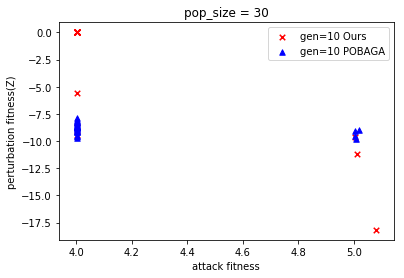

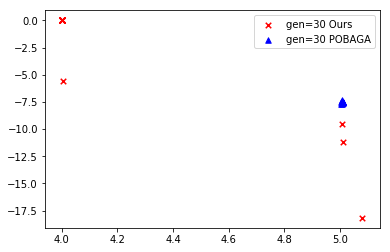

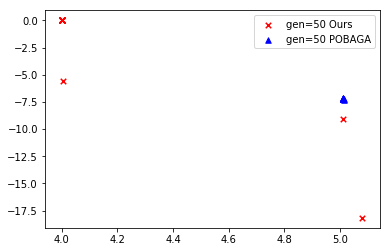

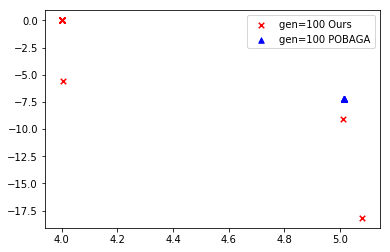

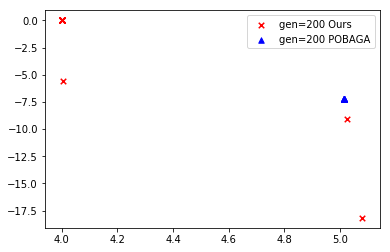

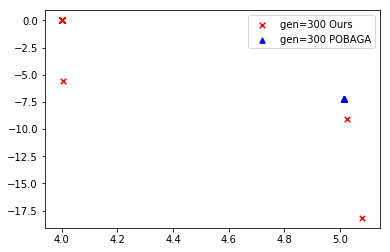

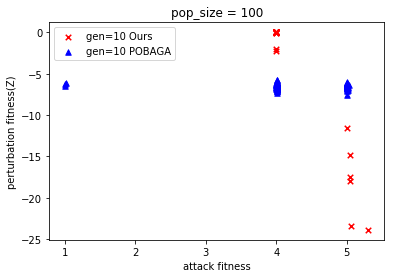

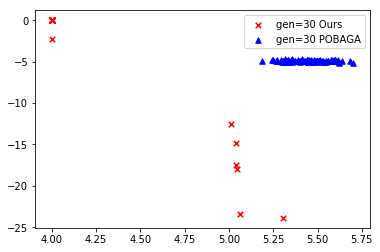

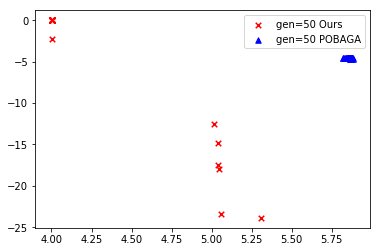

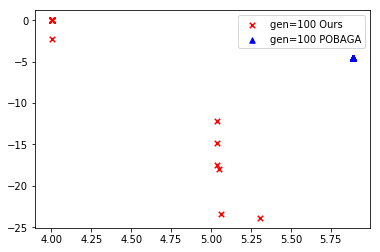

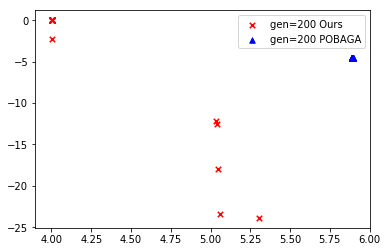

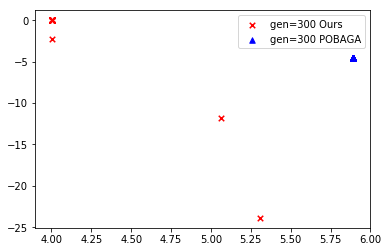

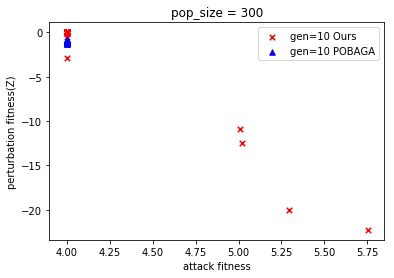

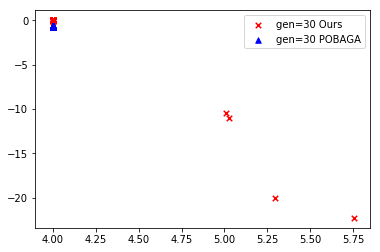

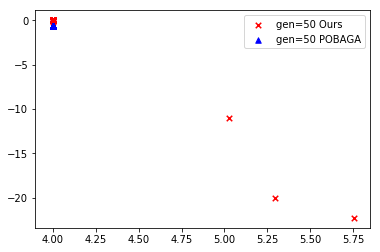

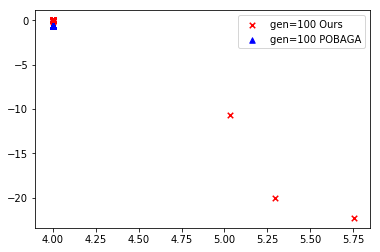

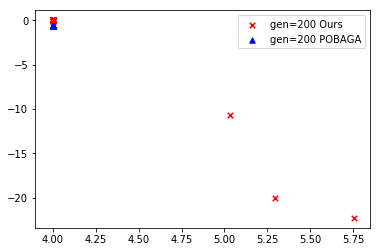

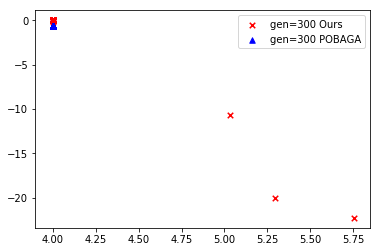



  0%|          | 1/10000 [28:15<4709:48:40, 1695.70s/it]

====data1===
vgg16 cifar10


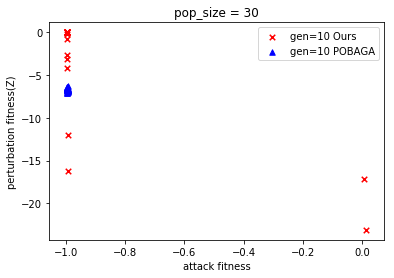

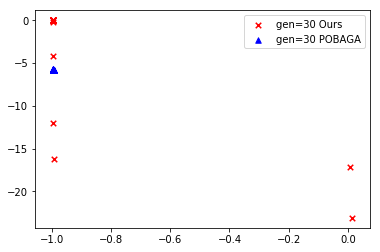

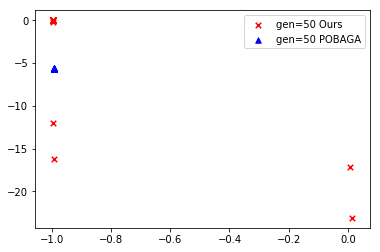

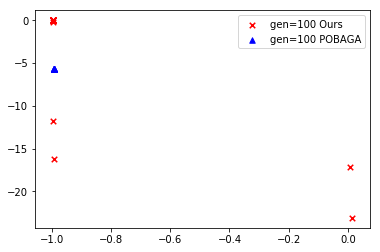

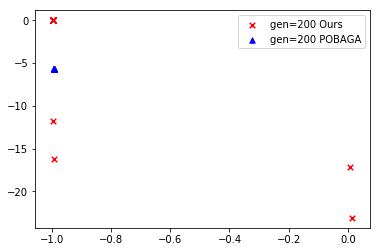

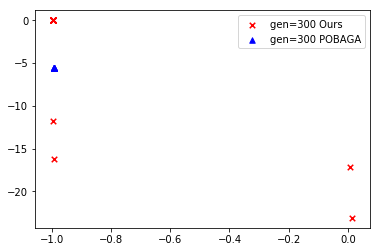

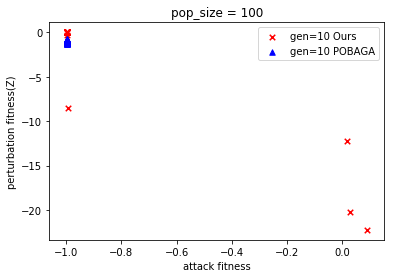

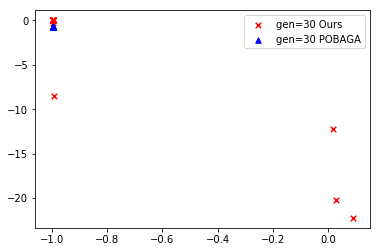

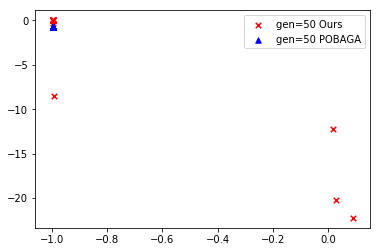

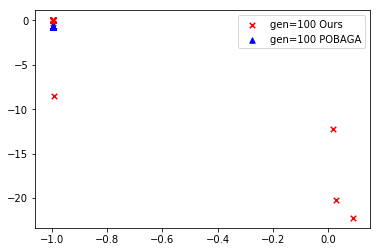

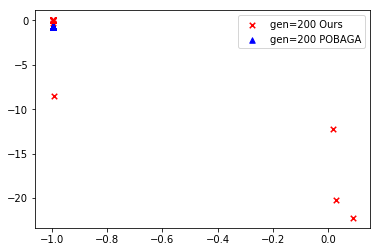

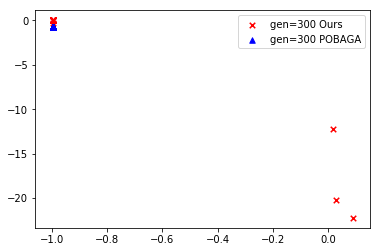

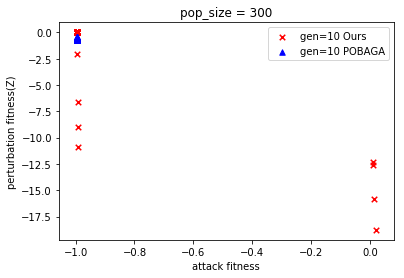

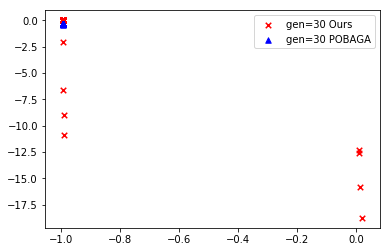

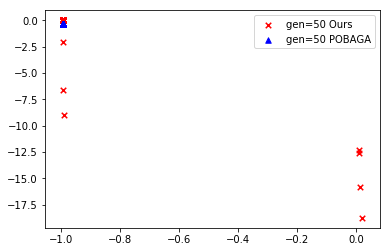

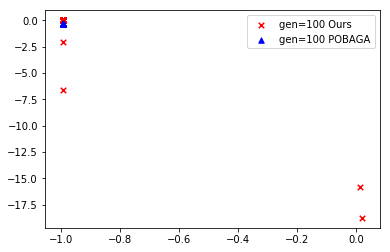

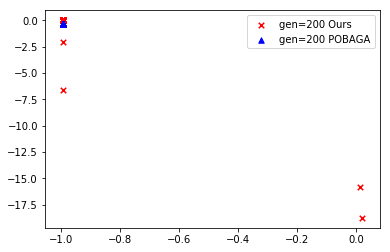

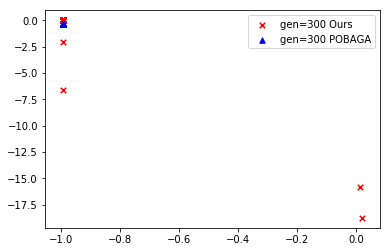



  0%|          | 2/10000 [56:34<4712:13:19, 1696.74s/it]

====data2===
vgg16 cifar10


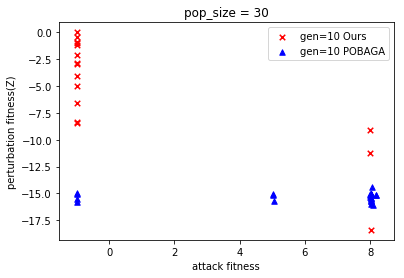

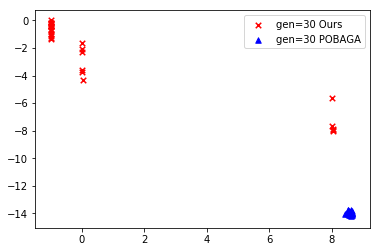

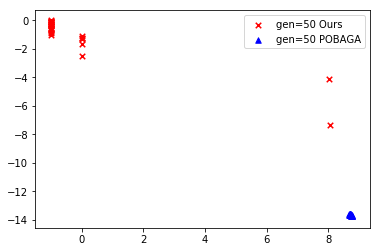

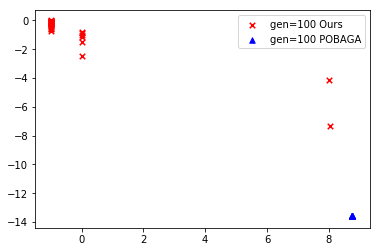

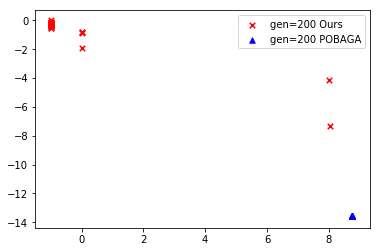

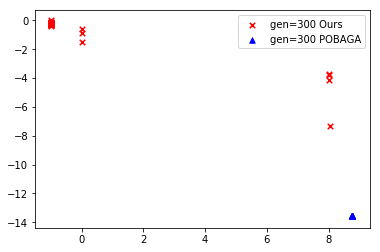

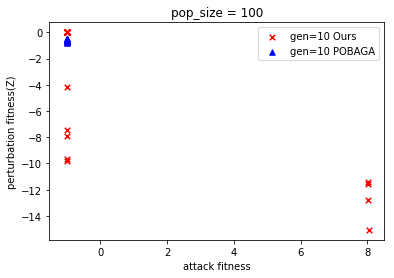

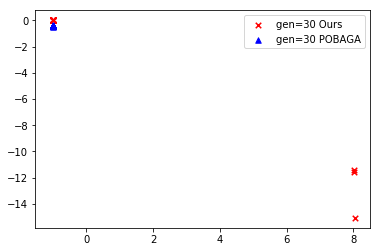

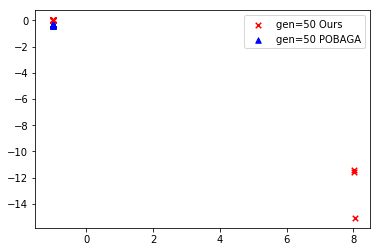

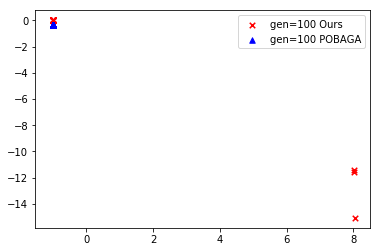

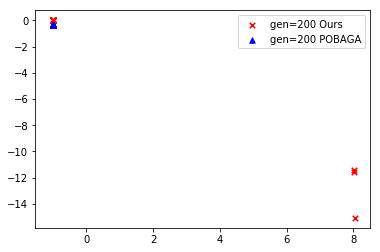

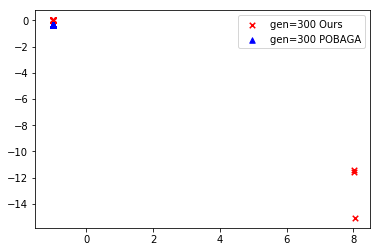

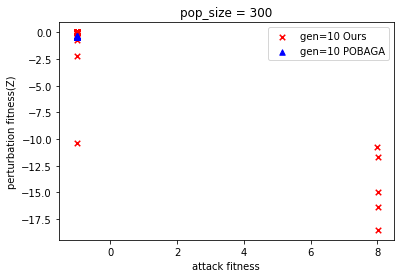

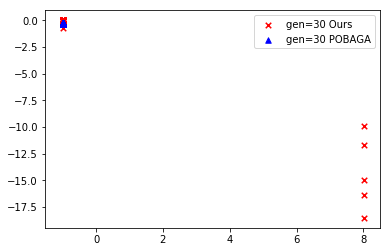

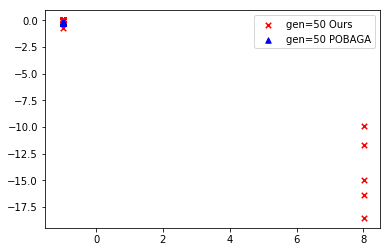

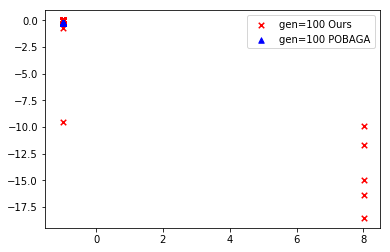

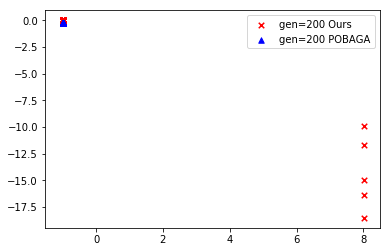

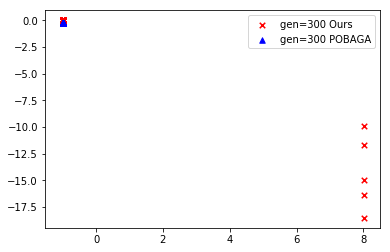



  0%|          | 3/10000 [1:25:05<4723:07:38, 1700.84s/it]

====data3===
vgg16 cifar10


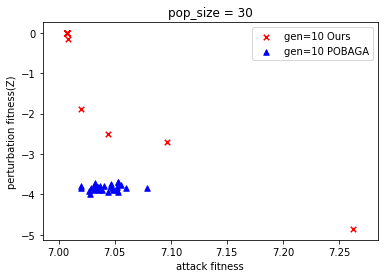

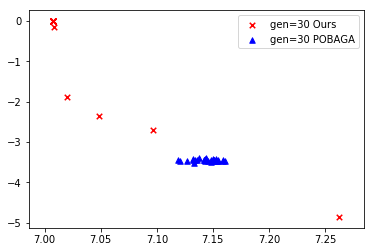

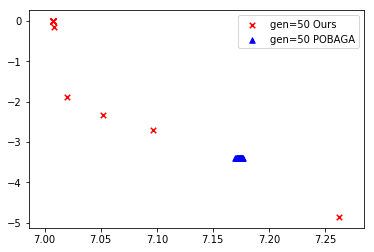

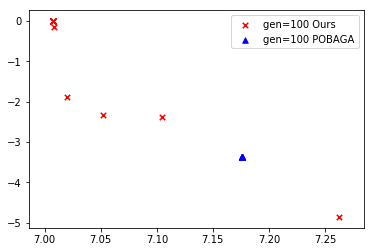

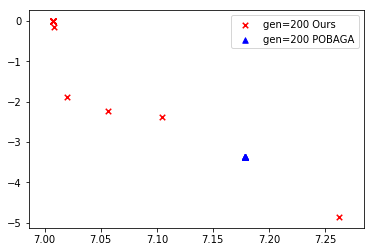

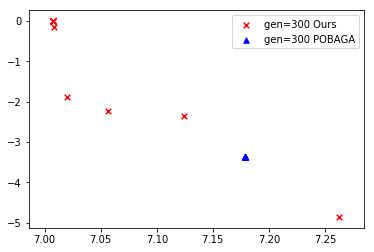

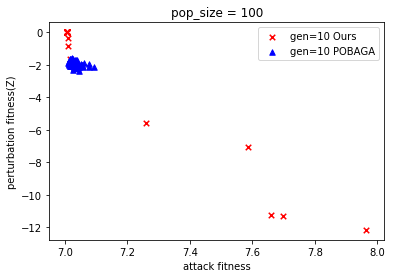

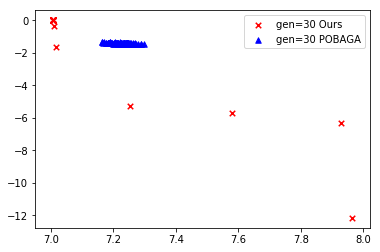

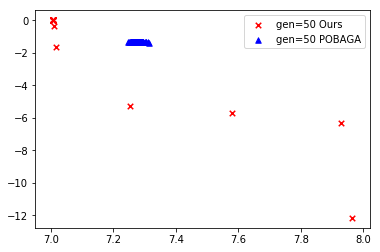

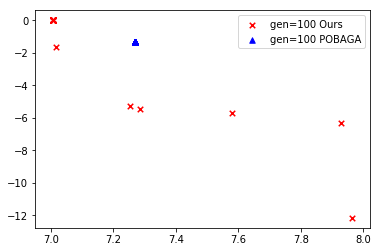

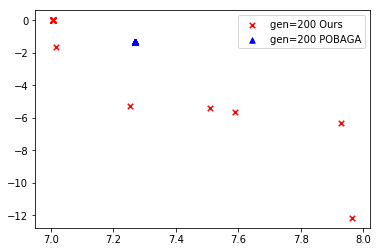

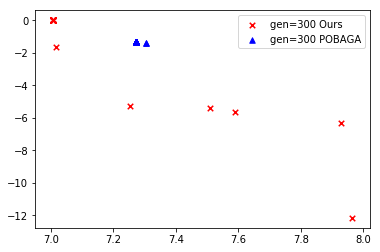

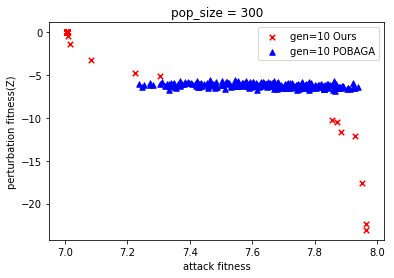

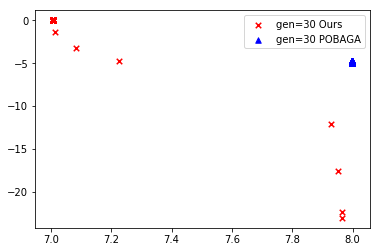

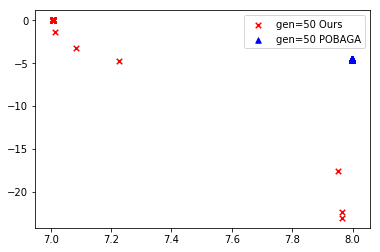

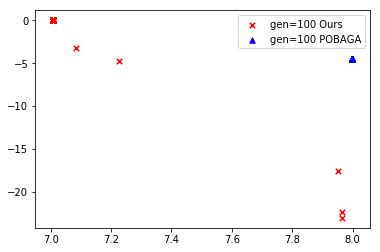

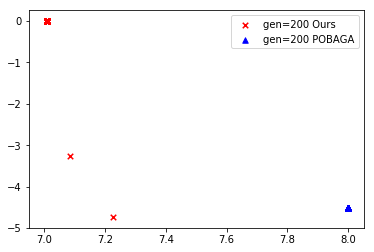

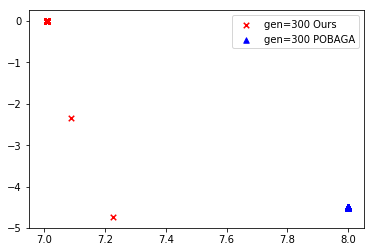



  0%|          | 4/10000 [1:53:04<4704:18:25, 1694.23s/it]

====data4===
vgg16 cifar10


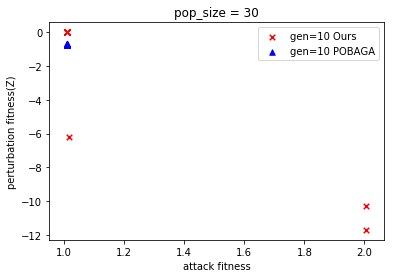

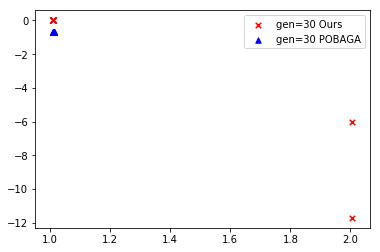

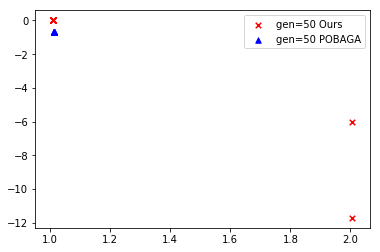

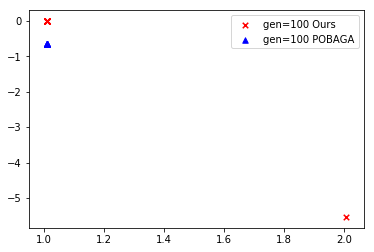

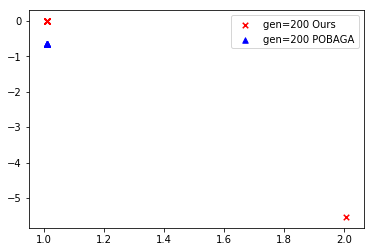

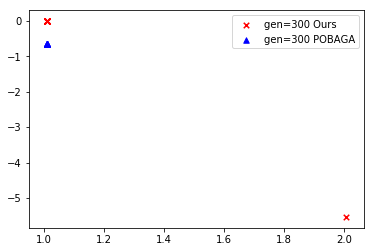

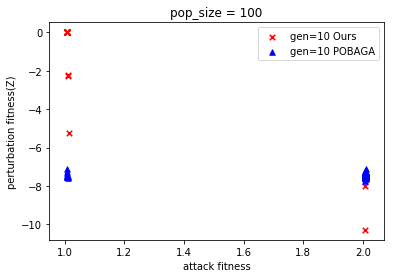

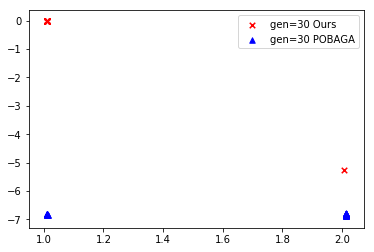

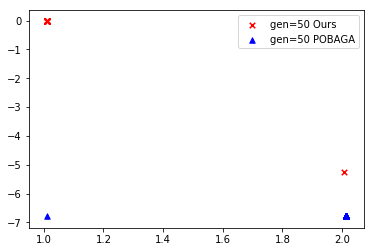

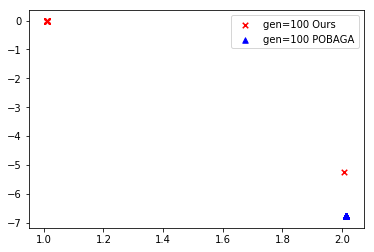

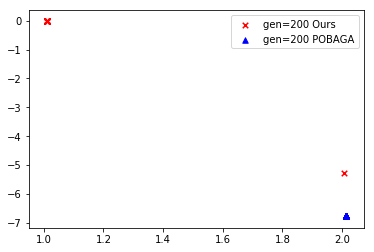

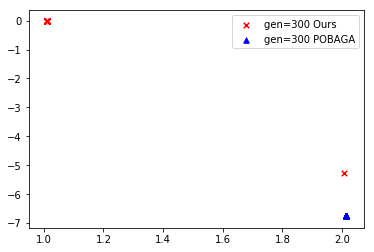

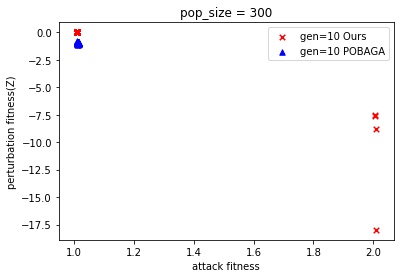

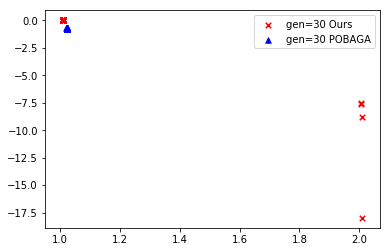

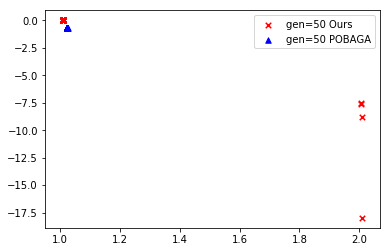

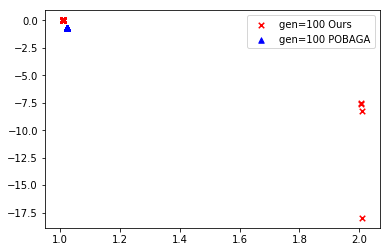

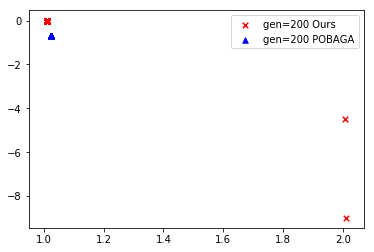

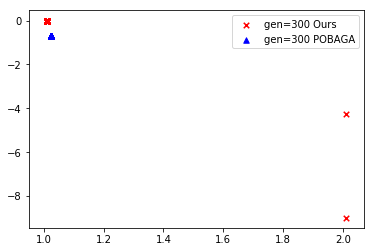



  0%|          | 5/10000 [2:21:22<4707:19:49, 1695.49s/it]

====data5===
vgg16 cifar10


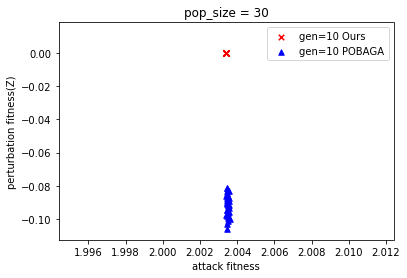

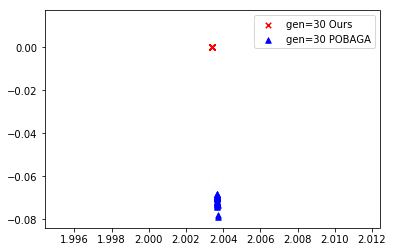

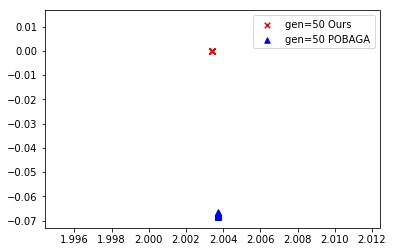

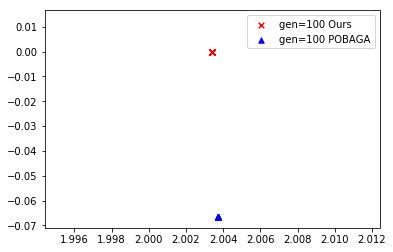

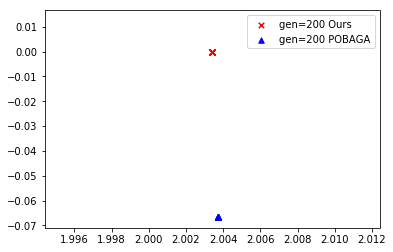

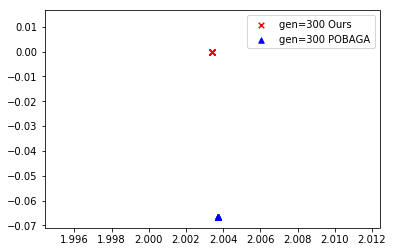

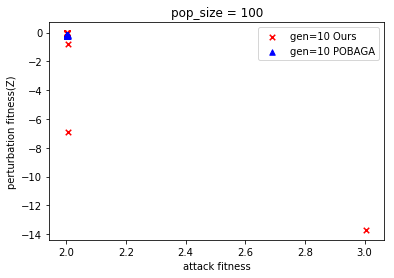

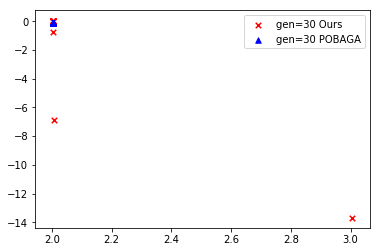

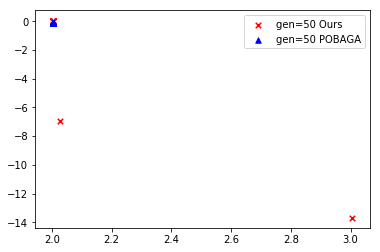

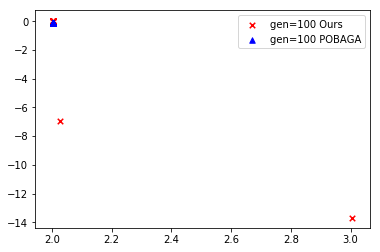

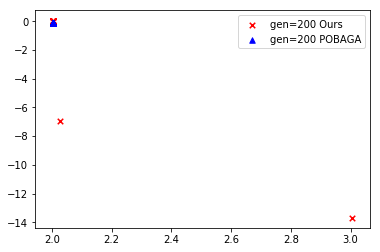

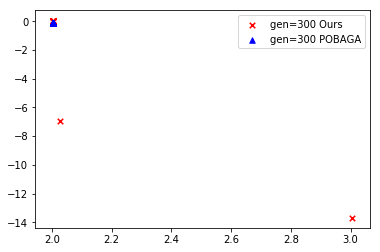

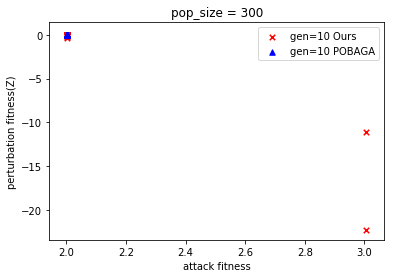

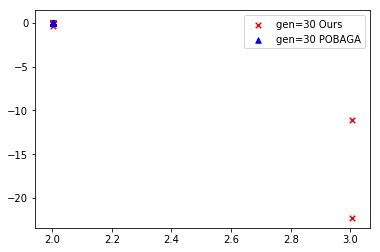

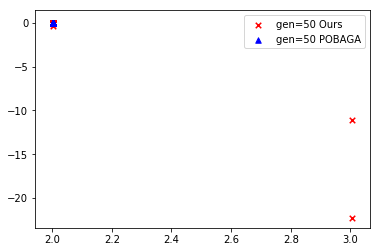

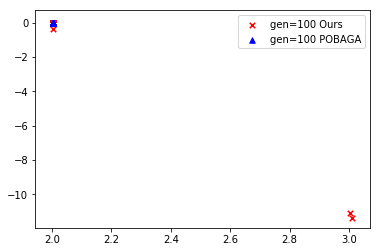

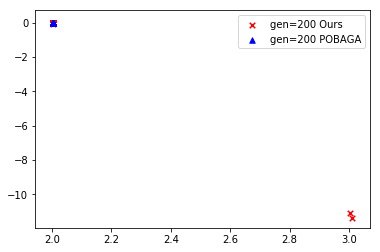

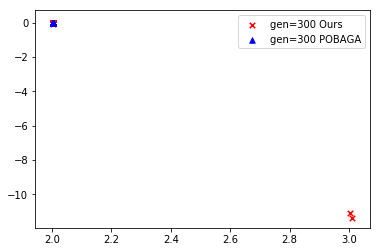



  0%|          | 6/10000 [2:49:35<4705:03:28, 1694.84s/it]

====data6===
vgg16 cifar10


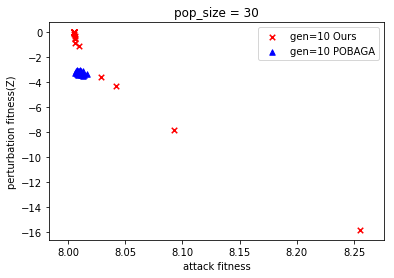

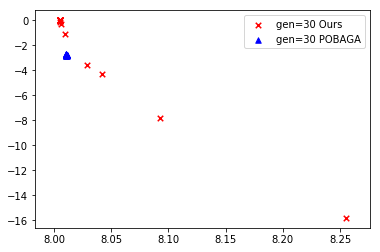

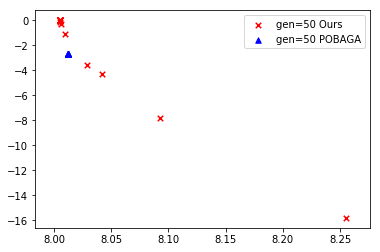

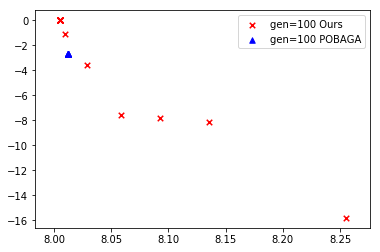

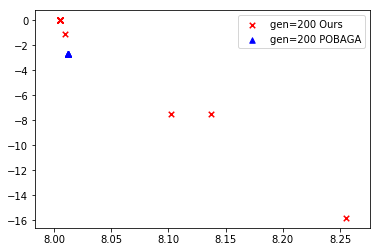

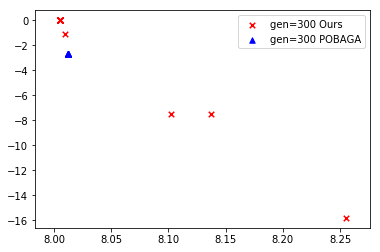

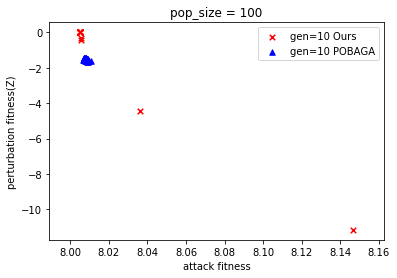

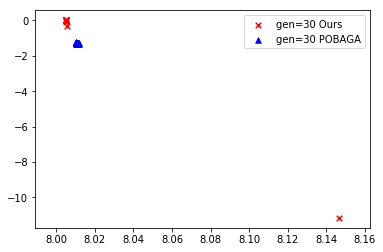

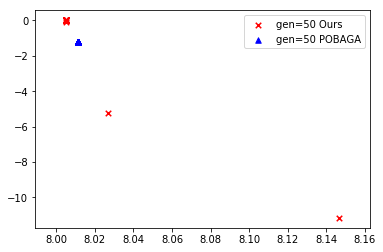

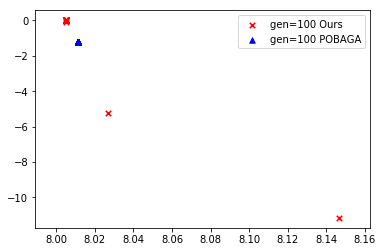

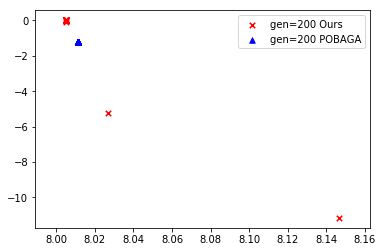

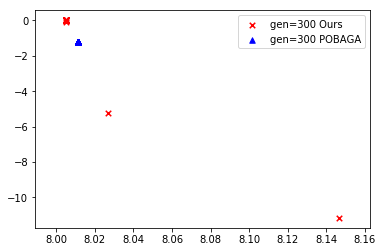

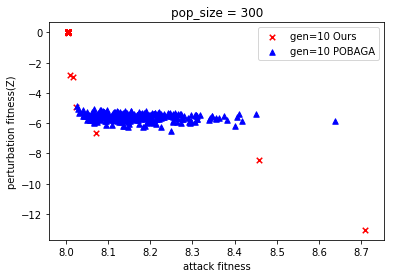

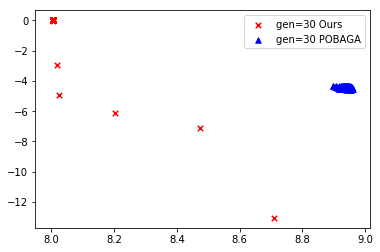

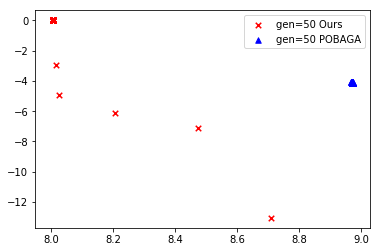

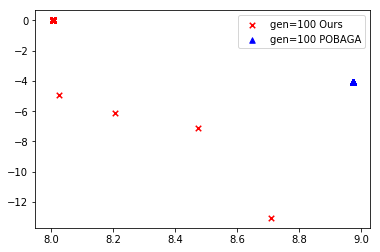

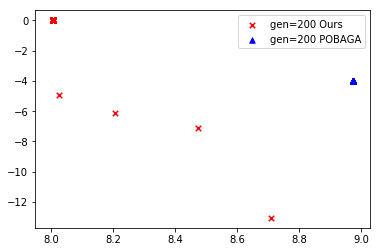

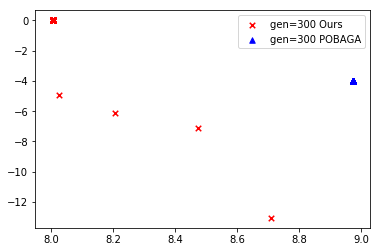



  0%|          | 7/10000 [3:17:35<4692:17:29, 1690.41s/it]

====data7===
vgg16 cifar10


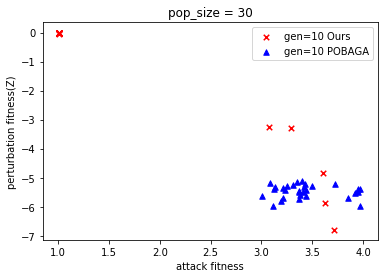

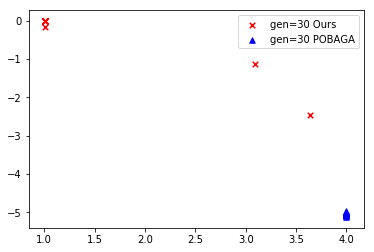

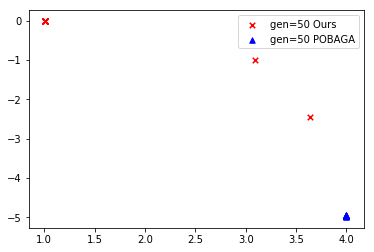

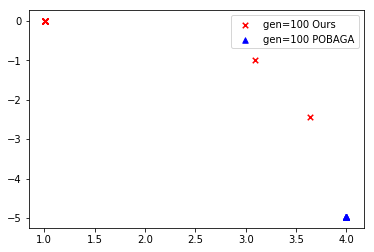

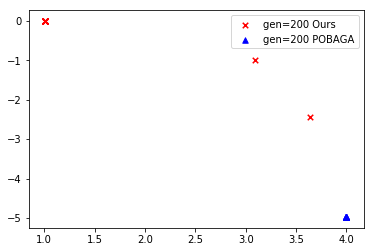

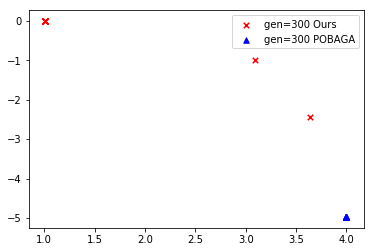

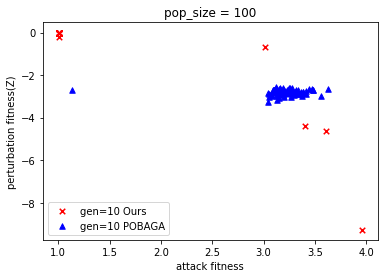

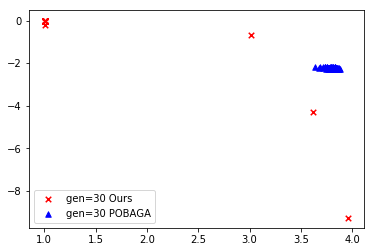

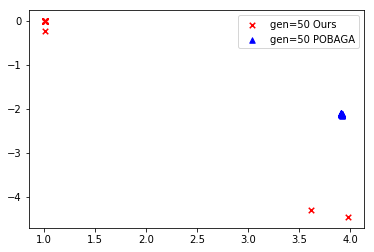

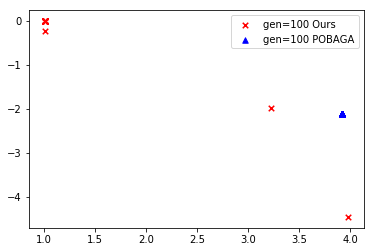

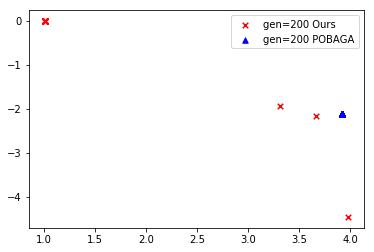

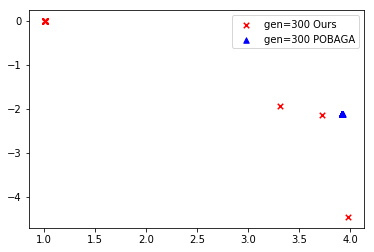

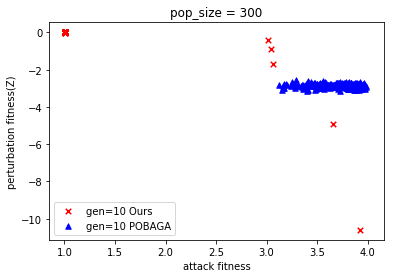

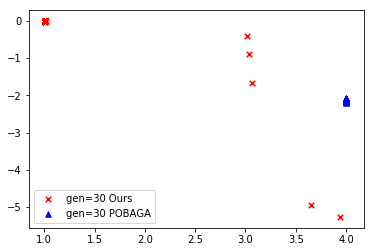

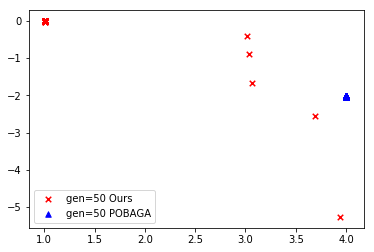

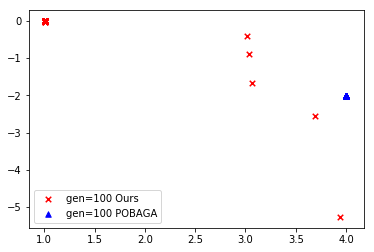

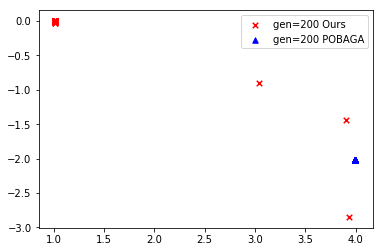

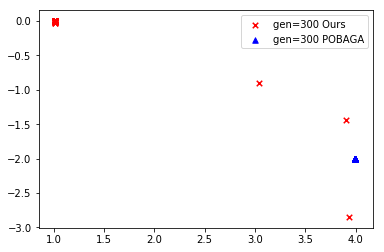



  0%|          | 8/10000 [3:45:37<4684:41:07, 1687.84s/it]

====data8===
vgg16 cifar10


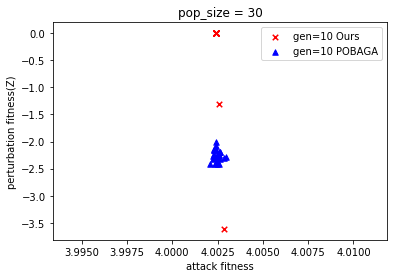

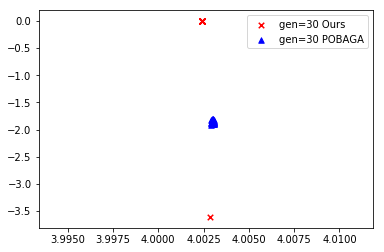

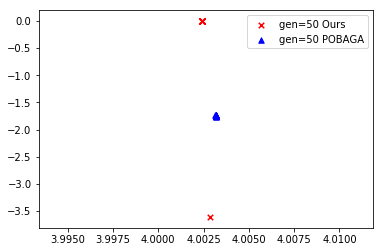

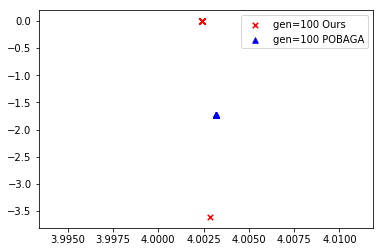

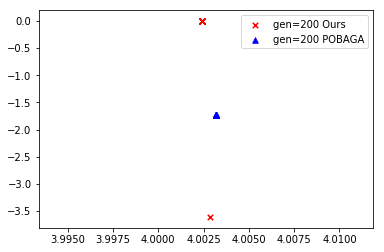

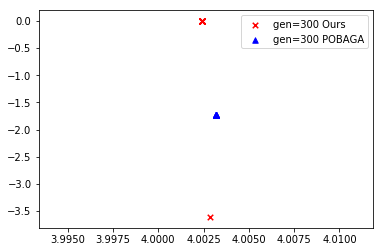

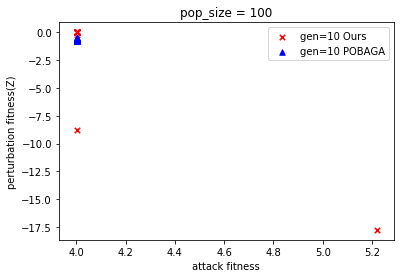

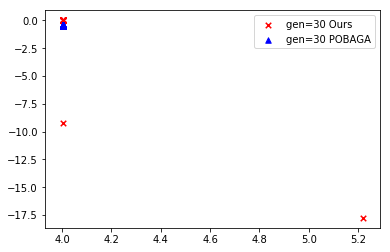

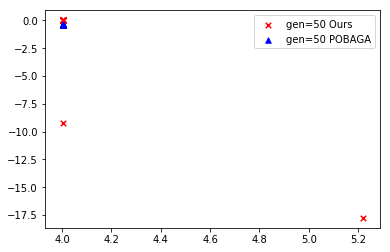

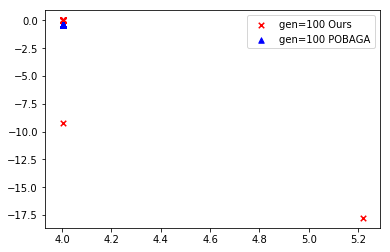

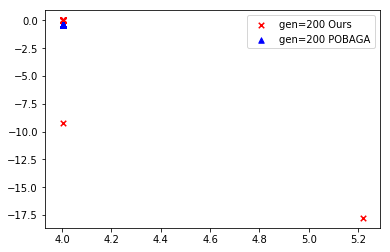

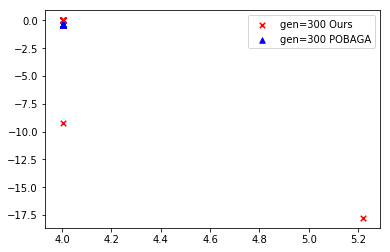

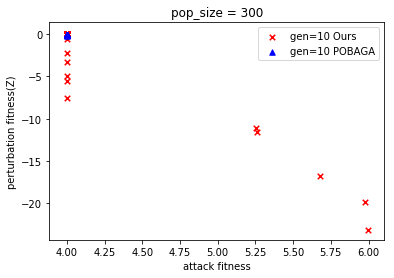

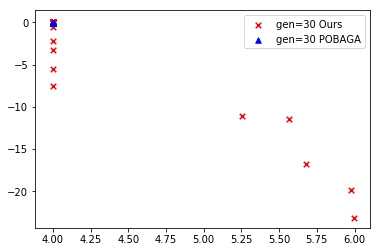

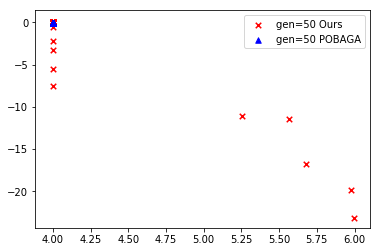

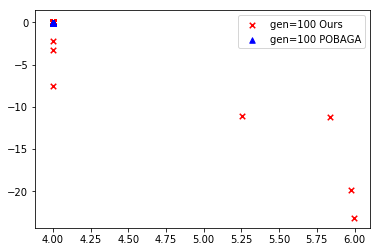

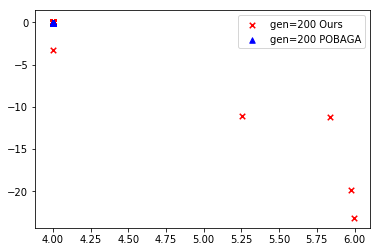

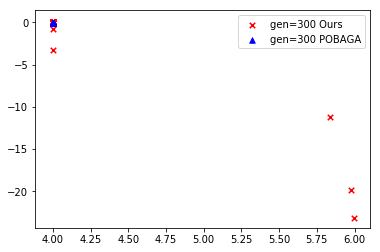



  0%|          | 9/10000 [4:14:06<4701:16:43, 1693.98s/it]

====data9===
vgg16 cifar10


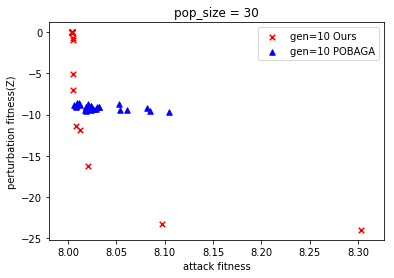

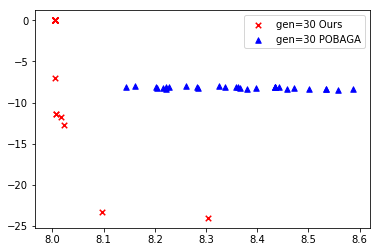

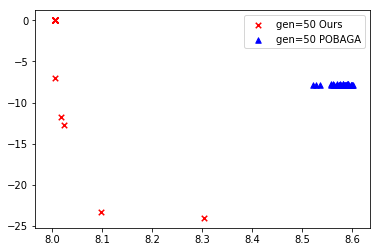

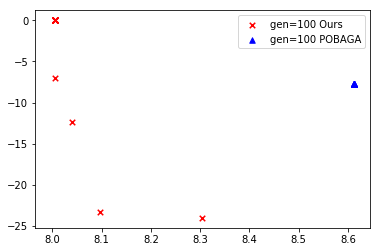

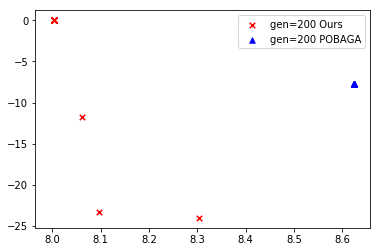

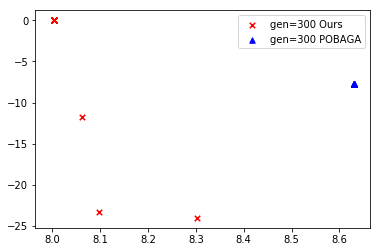

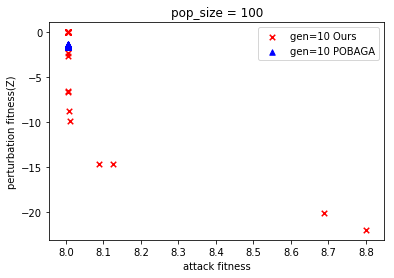

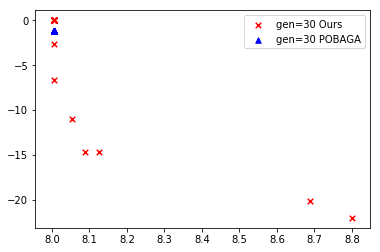

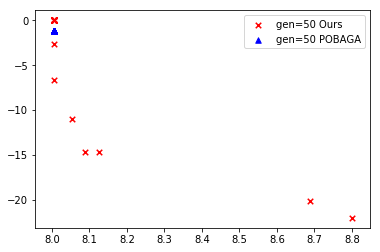

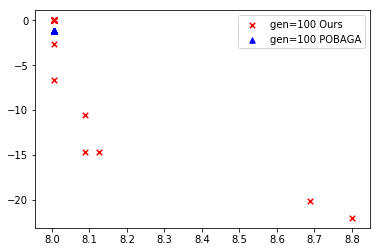

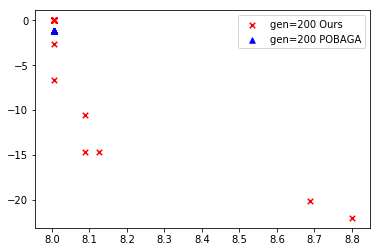

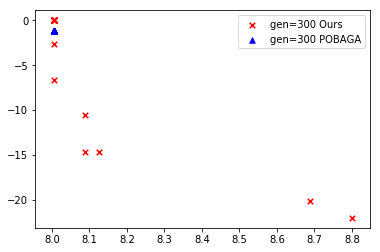

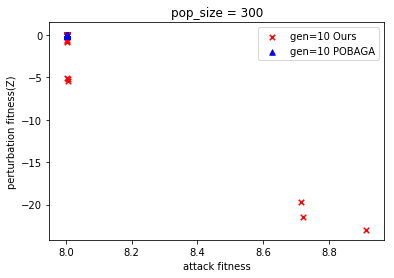

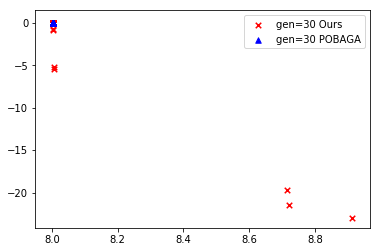

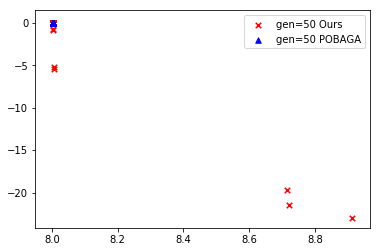

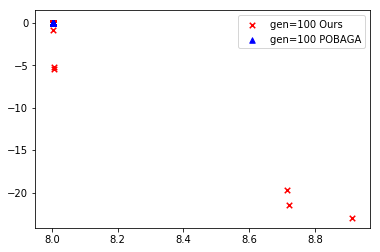

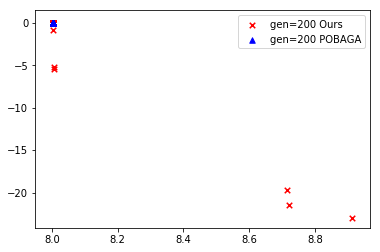

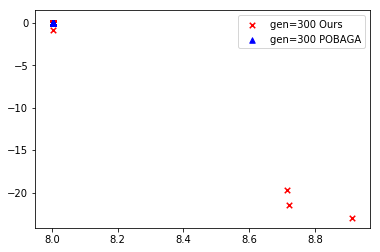



  0%|          | 10/10000 [4:42:16<4698:05:31, 1693.01s/it]

====data10===
vgg16 cifar10


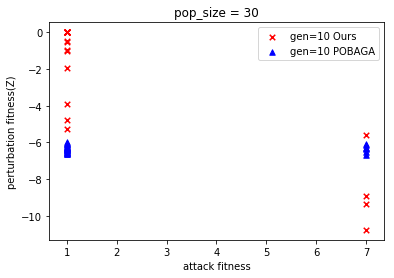

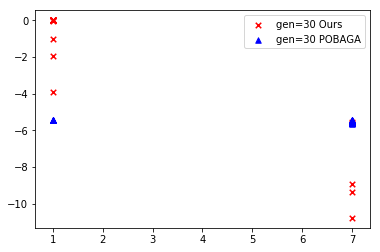

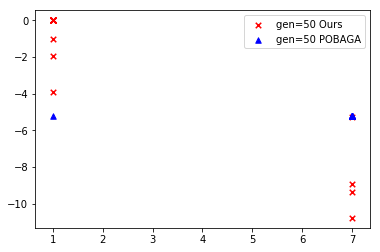

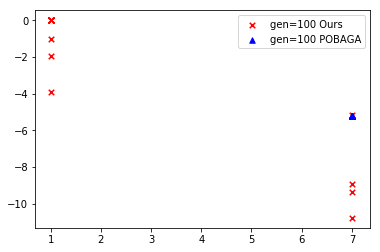

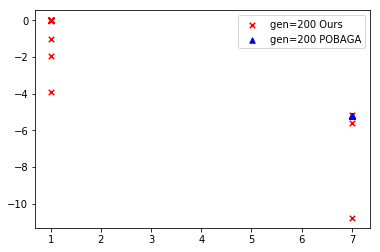

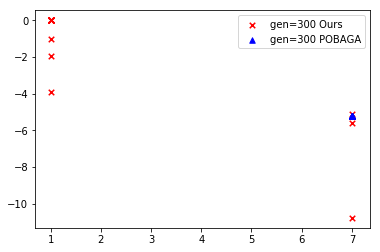

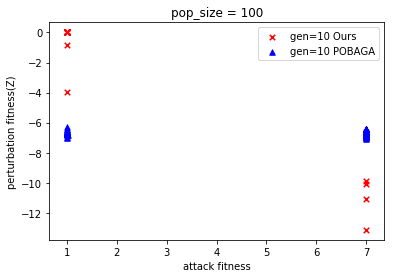

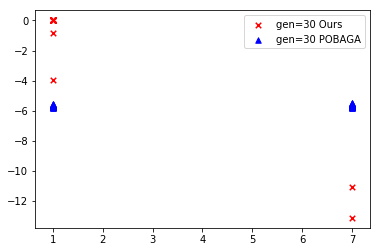

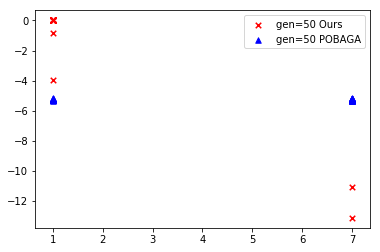

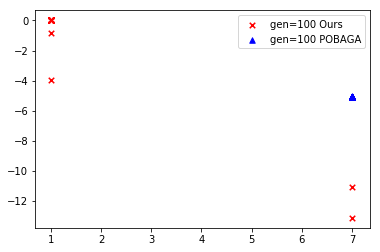

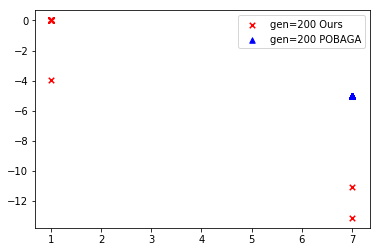

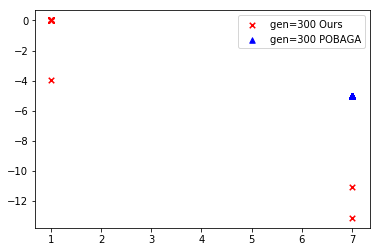

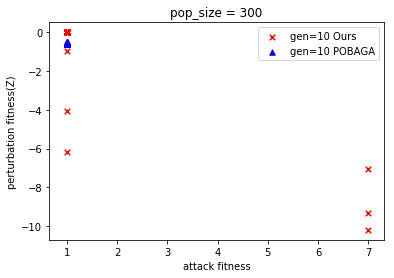

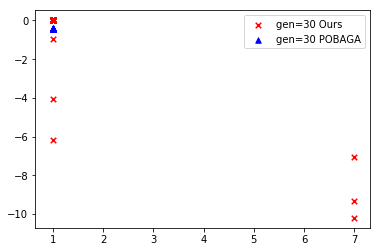

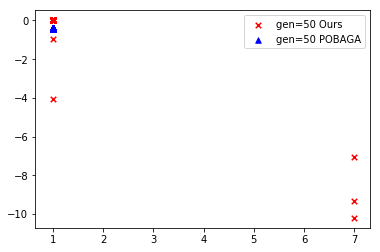

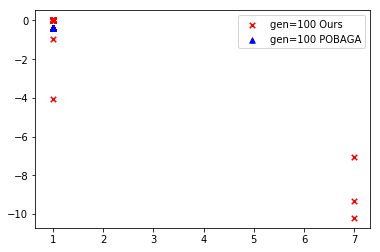

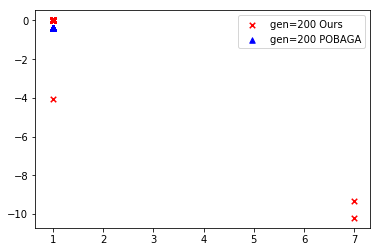

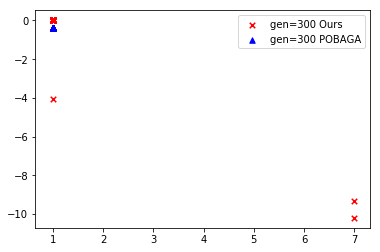

In [13]:
# checkpoints = [10,30,50,100,200,300]
checkpoints = [300]
n_generation = checkpoints[-1]
for idx,data in enumerate(tqdm(dataloader)):
    print("====data{}===".format(idx))
    print(model_name,dataset_name)
    for pop_size in [30,100,300]:
        result_nsga = run_NSGA2(model, data[0][0], pop_size, n_generation, fitness_fn,checkpoints= checkpoints)
        result_poba = run_POBA_GA(model, data[0][0], pop_size, n_generation, fitness_fn,checkpoints= checkpoints)
        plot_results(result_nsga,result_poba,pop_size,checkpoints)

    if idx ==10:
        break
#         fit1s = [fit[0] for fit in result_fit[0]]
#         fit2s = [fit[1] for fit in result_fit[0]]
#         f1s = [fit[0] for fit in f]
#         f2s = [fit[1] for fit in f]
#         NSGA2_fit1s.append(fit1s)
#         NSGA2_fit2s.append(fit2s)
#         POBAs_fit1s.append(f1s)
#         POBAs_fit2s.append(f2s)

In [ ]:
# advantages
# Have multiple options to choose
# => Stability on attack! 
# => It can assure good perturbation
# Can Resolve Issues in POBA-GA
# minus fitness issue
# => hard to adjust fitness-based selection algorithm(roulette wheel selection (which is used in the original paper)) => elitism
# => no worry to make appropriate selection 

In [75]:
fit1s = [fit[0] for fit in result_fit[0]]
fit2s = [fit[1] for fit in result_fit[0]]
f1s = [fit[0] for fit in f]
f2s = [fit[1] for fit in f]

mean_1,s_1 = np.mean(fit1s), np.std(fit1s+f1s)
mean_2,s_2 = np.mean(fit2s), np.std(fit2s+f2s)

fit1s = (np.array(fit1s)-mean_1)/s_1
fit2s = (np.array(fit2s)-mean_2)/s_2
f1s = (np.array(f1s)-mean_1)/s_1
f2s = (np.array(f2s)-mean_2)/s_2

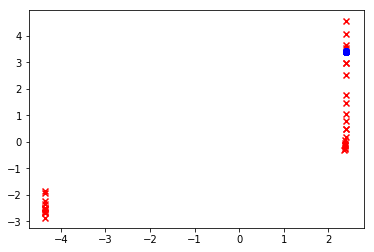

In [76]:
l1s = [np.mean(np.abs(img - data[0])) for img in result_img[0]]
l2s = [np.sqrt(np.mean((img - data[0])**2)) for img in result_img[0]]
# plt.scatter(fit1s,fit2s, c = l1s, marker = 'x')
plt.scatter(fit1s,fit2s, c = 'red', marker = 'x')
plt.scatter(f1s,f2s, c = 'blue', marker= 'o')


In [49]:
import torch
inp = torch.Tensor(result_img[0])
inp = inp.transpose(1,2).transpose(1,3).cuda()
inp_poba = torch.Tensor(img)
inp_poba = inp_poba.transpose(1,2).transpose(1,3).cuda()
with torch.no_grad():
    out = model(inp)
    out_poba = model(inp_poba)
    out = F.softmax(out,dim = -1)
    out_poba = F.softmax(out_poba,dim = -1)

In [44]:
torch.argmax(out,dim = -1)

tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9], device='cuda:0')

In [45]:
torch.argmax(out_poba,dim = -1)

tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6], device='cuda:0')

In [46]:
data[1]

[8]

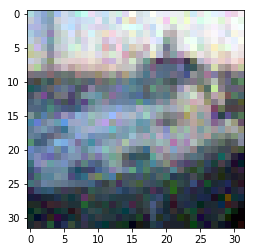

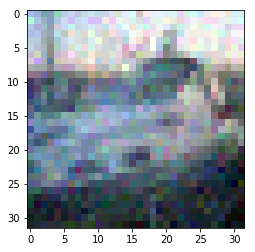

In [56]:
plt.imshow(img[0])
plt.show()
plt.imshow(result_img[0][0])

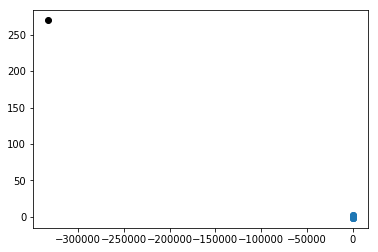

In [15]:
result_fit

[[[5.96184616163373, -41.15252204304852],
  [5.983853163197637, -39.27383010086487],
  [5.986866088584065, -35.706458928543725]]]

In [8]:
result_img

[[array([[[0.61960787, 0.41816751, 0.20199077],
          [0.62352943, 0.43529412, 0.18950507],
          [0.64705884, 0.45490196, 0.2       ],
          ...,
          [0.53725493, 0.37254903, 0.14117648],
          [0.46918772, 0.35686275, 0.08532239],
          [0.45490196, 0.46687152, 0.15431997]],
  
         [[0.59607846, 0.45934938, 0.29334183],
          [0.59215689, 0.3767804 , 0.15686275],
          [0.69134379, 0.44705883, 0.1831444 ],
          ...,
          [0.64634338, 0.36834992, 0.1123032 ],
          [0.49019608, 0.31349289, 0.1254902 ],
          [0.49827689, 0.34509805, 0.17622045]],
  
         [[0.59215689, 0.50871697, 0.18431373],
          [0.5228426 , 0.44532258, 0.12941177],
          [0.59166677, 0.46905374, 0.14117648],
          ...,
          [0.51754111, 0.28135982, 0.13333334],
          [0.50980395, 0.37254903, 0.13333334],
          [0.4261493 , 0.34901962, 0.0861358 ]],
  
         ...,
  
         [[0.26666668, 0.56758844, 0.69411767],
          [0.1

In [5]:
result_fit, result_img

([[[5.96184616163373, -41.15252204304852],
   [5.983853163197637, -39.27383010086487],
   [5.986866088584065, -35.706458928543725]]],
 [[array([[[0.61960787, 0.41816751, 0.20199077],
           [0.62352943, 0.43529412, 0.18950507],
           [0.64705884, 0.45490196, 0.2       ],
           ...,
           [0.53725493, 0.37254903, 0.14117648],
           [0.46918772, 0.35686275, 0.08532239],
           [0.45490196, 0.46687152, 0.15431997]],
   
          [[0.59607846, 0.45934938, 0.29334183],
           [0.59215689, 0.3767804 , 0.15686275],
           [0.69134379, 0.44705883, 0.1831444 ],
           ...,
           [0.64634338, 0.36834992, 0.1123032 ],
           [0.49019608, 0.31349289, 0.1254902 ],
           [0.49827689, 0.34509805, 0.17622045]],
   
          [[0.59215689, 0.50871697, 0.18431373],
           [0.5228426 , 0.44532258, 0.12941177],
           [0.59166677, 0.46905374, 0.14117648],
           ...,
           [0.51754111, 0.28135982, 0.13333334],
           [0.50980395, 